# Lab 8 : Star Formation 

In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [2]:
# function that returns the star formation rate given the luminosity of the galaxy
def StarFormationRate(L, Type, TIR=0):
    # function computes the star formation rate
    # following kennicutt and Evans 2012 eqn 12
    
    # inputs:
    #     L : the luminosity of a galaxy in ergs/s
    #     Type: string lists the wavelength of luminosity
    #               FUV, NUV, TIR, Halpha
    #     TIR: Total Infrared luminosity (defaults = 0)
    
    # returns:
    #     log of star formation rate (Msun/yr)
    
    
    if (Type == "FUV"):
        logCx = 43.35  # Calibration from L to SFR from Table 1 (K&E 2012)
        TIRc = 0.46 # Correction for dust absorption from table 2 (K&E 2012)
    elif (Type == "NUV"):
        logCx = 43.17
        TIRc = 0.27
    elif (Type == "Halpha"):
        logCx = 41.27
        TIRc = 0.0024
    elif (Type == "TIR"):
        logCx = 43.41
        TIRc = 0
    else:
        print("Missing Wavlength: FUV, NUV, Halpha, TIR")
    
    # Correct the Luminosity for dust
    Lnew = L + TIRc*TIR
    
    return np.log10(Lnew) - logCx

Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [3]:
# convert Luminosity units
LsunErgS = const.L_sun.to(u.erg/u.s).value

In [4]:
# WLM Dwarf Irregular Galaxy
# Lee et al 2009 WLM galaxy log(SFR) derived from UV is -2.21 --> Galex

# from NED: WLM NUV luminosity (GALEX) = 1.71E+07 Lsun
#               NIR luminosity (IRAC) = 2.48E+06  Lsn

NUV_WLM = 1.71e7 * LsunErgS
TIR_WLM = 2.48e6 * LsunErgS

StarFormationRate(NUV_WLM, "NUV", TIR_WLM)



-2.3373504191027266

In [5]:
#  N24 Sc galaxy
# Lee+2009 , NGC24 log(SFR) derived from UV as -0.7
# NED NUV luminosity (GALEX) =  2.96e8 Lsun
#     FIR luminosity (MIPS)  =  3.09e8 Lsun
#     NIR Luminoisty (2MASS) =  8.34e8 Lsun

NUV_N24 = 2.96e8 * LsunErgS
TIR_N24 = 3.09e8 * LsunErgS + 8.34e8*LsunErgS


StarFormationRate(NUV_N24, "NUV", TIR_N24)

-0.8055527449424105

# Part B Star formation main sequence

Write a function that returns the average SFR of a galaxy at a given redshift. 

What is the average SFR of a MW mass galaxy today? at z=1?

Plot the SFR main sequence for a few different redshifts.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

In [6]:
# a function that returns the average star formation rate of a galaxy at a given redshift

def SFRMainSequence(Mstar, z):
    """ Average star formation rate of a galaxy as a function of stellar mass and redshift
    inputs:
         Mstar: stellar mass of the galaxy in Msun
         z: redshift
    retruns:
        log(SFR (Msun/yr))
    """
    alpha = 0.7 - 0.13*z
    beta = 0.38 + 1.14*z - 0.19*z**2
    
    return alpha*(np.log10(Mstar)-10.5) + beta

In [7]:
# MW at z=0

10**SFRMainSequence(6e10, 0)

# actual sfr is only 1 Msun/yr

3.7558295562247412

In [8]:
# MW at z = 1

10**SFRMainSequence(6e10,1)


30.799680595160783

In [9]:
# create an array of stellar masses
Mstars = np.linspace(1e9,1e12)
print(Mstars)

[1.00000000e+09 2.13877551e+10 4.17755102e+10 6.21632653e+10
 8.25510204e+10 1.02938776e+11 1.23326531e+11 1.43714286e+11
 1.64102041e+11 1.84489796e+11 2.04877551e+11 2.25265306e+11
 2.45653061e+11 2.66040816e+11 2.86428571e+11 3.06816327e+11
 3.27204082e+11 3.47591837e+11 3.67979592e+11 3.88367347e+11
 4.08755102e+11 4.29142857e+11 4.49530612e+11 4.69918367e+11
 4.90306122e+11 5.10693878e+11 5.31081633e+11 5.51469388e+11
 5.71857143e+11 5.92244898e+11 6.12632653e+11 6.33020408e+11
 6.53408163e+11 6.73795918e+11 6.94183673e+11 7.14571429e+11
 7.34959184e+11 7.55346939e+11 7.75734694e+11 7.96122449e+11
 8.16510204e+11 8.36897959e+11 8.57285714e+11 8.77673469e+11
 8.98061224e+11 9.18448980e+11 9.38836735e+11 9.59224490e+11
 9.79612245e+11 1.00000000e+12]


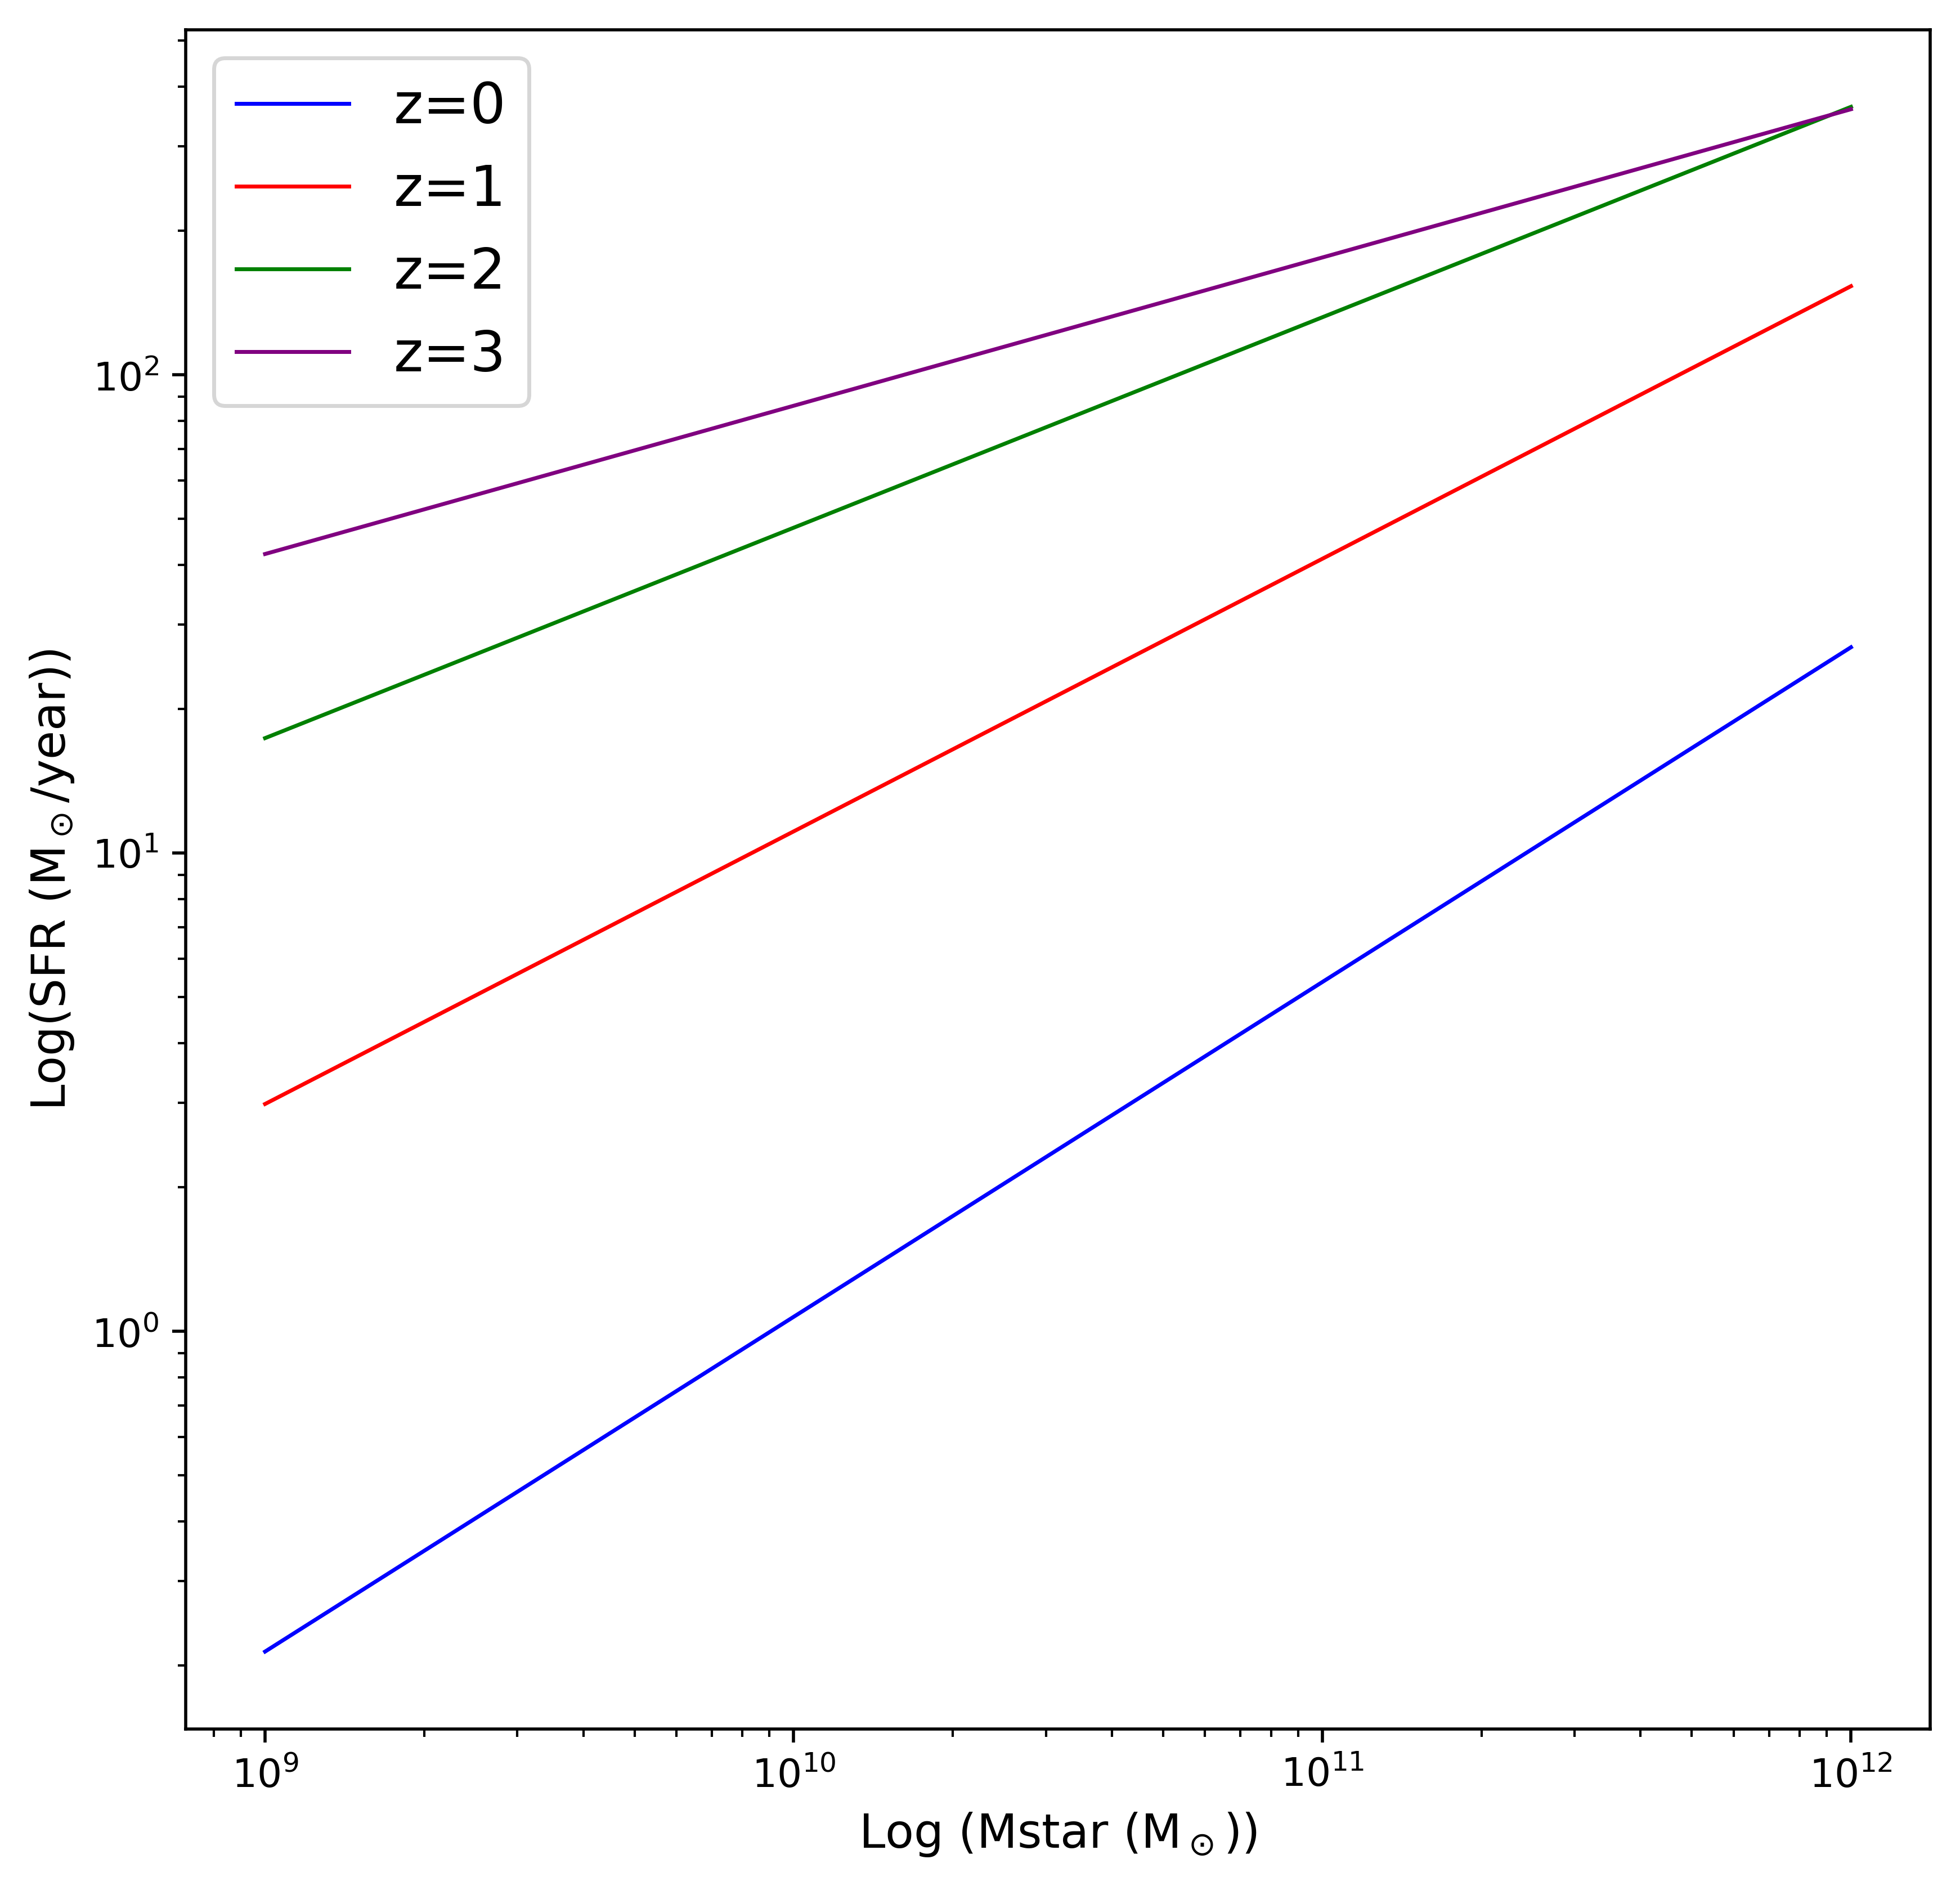

In [10]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.loglog(Mstars, 10**SFRMainSequence(Mstars,0), color="blue", linewidth=1,label="z=0")
plt.loglog(Mstars, 10**SFRMainSequence(Mstars,1), color="red", linewidth=1,label="z=1")
plt.loglog(Mstars, 10**SFRMainSequence(Mstars,2), color="green", linewidth=1,label="z=2")
plt.loglog(Mstars, 10**SFRMainSequence(Mstars,3), color="purple", linewidth=1,label="z=3")



# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Part C  Starbursts

What are the star formation rates for :

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [26]:
# normal galaxies 

# LIR = 10^10 Lsun

TIR_Normal = 1e10*LsunErgS
10**StarFormationRate(TIR_Normal, "TIR")

1.4892648150381245

In [25]:
# LIRGs  
TIR_LIRG = 1e11*LsunErgS

10**StarFormationRate(TIR_LIRG, "TIR")

14.892648150381245

In [24]:
# ULIRGs
TIR_ULIRG = 1e12*LsunErgS

10**StarFormationRate(TIR_ULIRG, "TIR")

148.92648150381245

In [23]:
# HLIRGs
TIR_HLIRG = 1e13*LsunErgS

10**StarFormationRate(TIR_HLIRG, "TIR")

1489.2648150381244